<!--# STAT 207: Data Science Exploration-->
## Statistics, Parameters and Random Variables

The Pew Research Center survey data illustrate a general challenge in statistical design and analysis of studies: we are interested in certain population parameters such as the proportion of adults in the population who hold a favorable few of a certain policy, but practical and financial considerations dictate that we can only query a sample of individuals. Two key questions are:


+ How should the sample be selected? A general principle is to select individuals using a random sampling mechanism. This will ensure that the results obtained from the sample will be **representative** of the population frame from which the study sample was drawn. 


+ Even if ideal random sampling is achieved, how far from the population results are the results that we see in the sample? 

In the previous section we saw that sample statistics such as the mean, median and proportion have inherent sampling variation that depends on which individuals are sampled. The good news is that this variation is predictable from probability models, and it can be estimated. 

For example, our Monte Carlo simulation experiments demonstrated that the sample proportion gets closer and closer, on average, to the population proportion as the sample size increases. In particular, its standard deviation, decreases in proportion to the square root of the sample size. 

In the next section we will discuss how we can get more precise uncertainty estimates, and use these to construct confidence intervals for population parameters.

First, we need some terminology:

**Definition:** A **parameter** is a quantitative measure or feature of a population or theoretical model. It can be a single number, an array of numbers combining multiple measures, or an entire function such as a age-adjusted mortality curve. 

**Definition:** a **statistic** is a quantitative measure or feature of an observed sample or an empirically estimated model. It can also be a single number, and array of numbers or even a function, as long as it can be completely determined by the observed sample.

In a wide range of applications we obtain sample statistics in order to gain information and draw conclusions about the population parameters. 

Before developing those methods, we explore the concept of a random variables, and study how random variables allow us to formulate models for variation in data more precisely.





This section explores several examples of random variables and their probability distributions including

+ **Bernoulli** - discrete 0/1 valued random variable

+ **Geometric** (special case of negative binomial) - discrete random variable with possible values {0, 1, 2, 3, ...}

+ **Normal** - continuous symmetric distribution on $(-\infty, \infty)$

+ **Truncated normal** - restriction of the normal distribution to a specific interval $[a, b]$

+ **Exponential** - a waiting time distribution on $[0, \infty)$

The **probability** of an event involving random variables follows basic rules. Furthermore, understanding when different events are **mutually exclusive** or **independent** is important in determining the probabilities of compound events. At the end of this section we provide a quick review along with illustrations of how certain probability principles apply to events involving random variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from scipy.stats import binom

In [4]:
binomcdf(6,0.9,1)

NameError: name 'binomcdf' is not defined

### Some background on random variables and distributions

#### Discrete random variables

In many cases, the model or random variable can only take on a finite or "countable" set of values. As an example, let's consider an experiment where we toss a coin until the first time we get "heads." This is like sampling repeatedly from the following data frame until we get an "H". We count how many we have to sample before "H" shows up.

In [2]:
coin = pd.DataFrame({'side': ['T', 'H']}, index=[0,1])
coin

,side
0,T
1,H


Here is some code using a "while" loop to keep flipping our simulated coin until we get 'heads'. Rerun the cell to see how the the count 'X' varies randomly. The .item() function pulls the value from the generated 1 item Series, so we can check if it equals 'H' or not. 

In [3]:
X = 0
flip='T'
while flip != 'H':
    flip = coin.sample(1)['side'].item()
    print(flip)
    X = X + 1
X

T
T
T
T
H


5

Here we take $X$ to be the random number of times we have to toss the coin. We'll assume for now that "heads" and "tails" are equally likely, and that all tosses are independent. 

The possible values of $X$ are: 1, 2, 3, ...

What are the probabilities of the different values?

Let's work out the first few probablities: 

$$
P(X=1) = P(H\, \text{first toss}) = {1\over 2} = 0.50
$$

$$
P(X=2) = P(T\, \text{first}, H\, \text{next}) = {(1)(1)\over (2)(2)} = {1\over 4} = 0.25
$$

$$
P(X=3) = P(T\, \text{first}, T\, \text{second}, H\, \text{third}) = {(1)(1)(1)\over (2)(2)(2)} = {1\over 8} = 0.0125
$$


A pattern is emerging. Let's consider a generic possible value $k > 1$. In order to get $X=k$ we need to get $k-1$ tails and then a head. There are $2^k$ possible outcomes for the first $k$ tosses. But there is only one sequence of $k$ heads and tails of the form TTT...TTH. Because all possible sequences are equally likely it follows that

$$
p(k) = P(X = k) = {1\over 2^k} = {\left({1\over 2}\right)^k}, \quad k=1,2,3,\ldots
$$

Values in between the *discrete* integer counts are not possible in this example, so we refer to $X$ and its distribution as being **discrete**. For discrete random variables we can describe their distribution by the **probability mass function (pmf)** instead of the probability density function. The pmf gives the probabilities of all the dsicrete possible values of the random variable.

The SciPy library includes the distribution above, except for the random variable $Y = X-1$ instead of $X$ as defined above. We can think of $Y$ as the number of "Tails" before the first "Heads" toss.

What is the pmf for $Y$?

$$
p_Y(k) = P(Y=k) = P(X=k+1) = p_X(k+1) = \left({1\over 2}\right)^{k+1}, \quad k=0, 1, 2, \ldots
$$

Next we import a from a new library, scipy.stats, which includes many different probablity models for random variables and their distributions. In this case we import the negative binomial model package, 'nbinom'.

In [4]:
from scipy.stats import nbinom

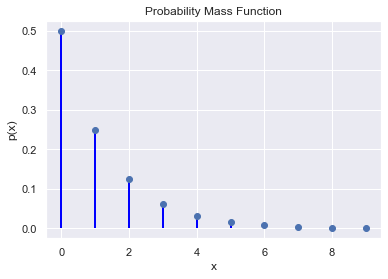

In [5]:
x = np.arange(0,10)
plt.plot(x, nbinom.pmf(x, n=1, p=0.5), 'bo')
plt.title("Probability Mass Function")
plt.vlines(x, 0, nbinom.pmf(x, n=1, p=0.5), lw=2, colors='blue')
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

For an arbitrary discrete distribution, let's denote the possible values in the population as

$$
x_1, x_2, x_3, \ldots
$$

These might be integers, or they could be some other discrete set such as a grid of numbers between 0 and 1. 

The **probability mass function (pmf)** is then given by

$$
p(x) = P(X=x) \quad x=x_1, x_2, x_3, \ldots
$$

and $p(x)=0$ if $x$ is not in the discrete set $\{x_1, x_2, x_3, \ldots\}$.

For discrete random variables we can define the **cumulative distribution function** in the same way as we do later for continuous random variables:

$$
F(x) = P(X\le x)\quad \text{for any value of } x
$$

**Example:** For the coin tossing example, what is the probability of at most 2.7 tails before the first heads? This is

$$
\begin{align}
F(2.7) &= P(Y \le 2.7) \\
&= P(Y \le 2.0) = p(0) + p(1) + p(2) = {1\over 2} + {1\over 4} + {1\over 8} = 0.875\\
\end{align}
$$


#### Continuous random variables

For a different kind of random variable, suppose we have a large population and for each member we have a quantitative feature, $X$ (e.g., hours watching of YouTube in a given week). If we knew $X$ for every member of the population we could summarize how it is distributed with a density histogram. Maybe it would look like the figure below, using one of the many families of distributions available in the SciPy library.

In [1]:
from scipy.stats import truncnorm

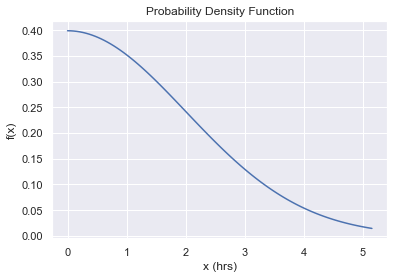

In [7]:
a, b, loc, scale = 0.0, 20, 0, 2
x = np.linspace(truncnorm.ppf(0.0, a=a, b=b, loc=loc, scale=scale), 
                truncnorm.ppf(0.99, a=a, b=b, loc=loc, scale=scale), 100)
plt.plot(x, truncnorm.pdf(x, a=a, b=b, loc=loc, scale=scale))
plt.xlabel('x (hrs)')
plt.ylabel('f(x)')
plt.title('Probability Density Function')
plt.show()

In the figure, $f(x)$ denotes the **probability density function (pdf)** for the random variable $X$, which represents the number of hours for one random draw from this population. Like the density histogram, the pdf represents probabilities by areas under the curve. Specifically,

$$
P(a \lt X \le b) = \int_a^b f(x) dx = \text{ area under the curve between a and b}.
$$

At this point, it is also useful to define the **cumulative distribution function (cdf)**, which gives the probability that $X$ is less than or equal to $x$ each any specific value x. In general we have

$$
F(x) = P(X \le x) \quad \text{ for any value of x}.
$$

With this definition it follows that

$$
P(a \lt X \le b) = F(b) - F(a).
$$

For many parametric families of distributions, including the distribution above, the cdf will be available via accurate numerical computing algorithms. 

Here is what the cdf looks like for the "YouTube watching" distribution:


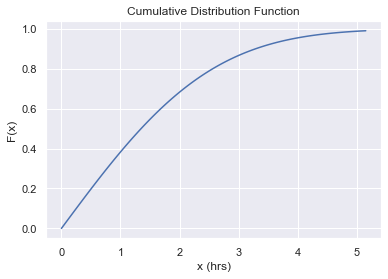

In [8]:
plt.plot(x, truncnorm.cdf(x, a=a, b=b, loc=loc, scale=scale))
plt.xlabel('x (hrs)')
plt.ylabel('F(x)')
plt.title('Cumulative Distribution Function')
plt.show()

Because the cdf is *continuous* with no jumps in the function, we say that the random variable $X$ is a *continuous* random variable, and the distribution is a *continuous* distribution.

The cdf increases as a function of the potential value $x$. Why? For any numbers $a$ and $b$ with $a < b$ the event
$\{X \le a\}$ implies the event $\{X \le b\}$ (why?). Therefore, for any such numbers we have: 

$$
a \lt b\quad \text{implies}\quad F(a) = P(X \le a)  \le P(X \le b) = F(b).
$$

The cdf curve is handy because the height of the curve at any point $x$ gives the probability that $X$ is less than or equal to that value $x$. 

### Population parameters

We next consider various types of parameters that could be used to describe the distribution or probability model for a random variable $X$. In each case we show the generic form of a scipy.stats function call to compute the parameter. Substitute the actual distribution for 'dist' in each expression. In each cases additional distribution arguments may be supplied.

**Examples:**


+ The **proportion less than or equal to 2** is  $p=P(X \le 2) = F(2)$.

        dist.cdf(2)


+ The **median** splits the probability distribution in half. For a continuous distribution the median solves $F(m)= {1\over 2}$. For a discrete distribution the median could be at a jump point of the cdf so we require $P(X \le m)\ge {1\over 2}$ and $P(X \ge m)\ge {1\over 2}$.

        dist.median()



+ The **first quartile** (25th percentile) $Q_1$ solves $F(Q_1) = 0.25$.

        dist.ppf(0.25)


+ The **mean** or **expectation** $\mu=E(X)$ is the center of mass of the distribution, which weights all the possible values by either their probablity density or their probability mass:

    - Continuous distributions:  $\mu=E(X)=\int x f(x) dx$

    - Discrete distributions: $\mu=E(X)=\sum_{i} x_i p(x_i)$


         dist.mean()
        


+ The **variance** is the mean squared deviation from the mean, $\sigma^2=Var(X)=E((X-\mu)^2)$.

        dist.var()


+ The **standard deviation** is the square root of the variance, 

$$
\sigma = SD(X) = \sqrt{Var(X)} = \text{root mean square of deviations from } \mu.
$$

        dist.std()
        

**Example: Bernoulli random variables.** Suppose $X$ can only be 0 or 1, and the probability of 1 is 0.90. The pmf is given by $p(0)=0.1$ and $p(1)=0.9$. The cdf has values:

$$
F(x) = 
\begin{cases}
0,\quad\quad x\lt 0\\ 
0.1,\quad 0\le x \lt 1\\
1, \quad\quad x\ge 1\\\end{cases}
$$

We see that 1 is the "median" of this distribution because $P(X \le 1)=0.9 \ge 0.5$ and $P(X \ge 1) = 0.9 \ge 0.5$. Basically, the cdf "jumps past 0.5" at 1, so that's where the median is. 

A harder case is if $p(0)=p(1)=0.5$. In this case, both $0$ and $1$ are medians, along with every value in between! The convention is then to define the median to be the middle of the median values, namely, 0.5.

The mean and variance of a Bernoulli random variable have simple forms. As an exercise, try to show that if $P(X=1)=p$, then $E(X)=p$ and $Var(X) = p(1-p)$.


**Example: Youtube viewing population with truncated normal distribution.**

Using ScyPy functions, we compute the mean, the median, the standard deviation, and the proportion less than 2 hours for this population.

In [9]:
params = ['mean', 'median', 'std', 'prop']
pop = [truncnorm.mean(a=a, b=b, loc=loc, scale=scale),
      truncnorm.median(a=a, b=b, loc=loc, scale=scale),
      truncnorm.std(a=a, b=b, loc=loc, scale=scale),
      truncnorm.cdf(2, a=a, b=b, loc=loc, scale=scale)]
pd.DataFrame({'population': pop}, index=params)

,population
mean,1.595769
median,1.348980
std,1.205621
prop,0.682689


Note: to get quick information about a function query it as in the following example:
?np.linspace

### Sample Statistics

**Mathematicatical notation using random variables**

Remembering that $X$ is a random variable representing one draw from the population distribution, we represent the sample data as a collection of $n$ *independent* random draws from the population:

$$
\text{Sample:}\quad X_1, X_2, X_3, \ldots, X_n.
$$

Using this notation the sample statistics analogous to the population parameters above can be described mathematically and operationally as follows. In each case the generic form of a pandas function call is given. Substitute the name of data frame for 'df' and the name of target variable for 'x'.


+ **Sample mean:** 

        df['x'].mean()

$$
\bar{X} = {1\over n} \sum_{i=1}^n X_i = {X_1+X_2+X_3+\cdots+X_n\over n}
$$


+ **Sample variance:**

        df['x'].var()

$$
S^2 = {1\over n-1} \sum_{i=1}^n (X_i - \bar{X})^2
$$

+ **Standard deviation:**  

        df['x'].std()

$$
S = \sqrt{S^2}
$$

+ **Proportion $\le$ 2:**

        (df['x'] <= 2).mean()

$$
\hat{p} = {1\over n} \sum_{i=1}^n 1\{X_i \le 2\} = {\# \{X_i \le 2\}\over n}
$$

+ **Median:** Split the sorted data in half

        df['x'].median()

    1. Represent sorted data as  $X_{(1)}\le X_{(2)}\le\cdots\le X_{(n)}$
    
    2. Middle value if $n$ is odd: 
    
    $$
    M=X_{({n+1\over 2})}
    $$
    
    3. Average of two middle values if $n$ is even: 
    
    $$
    M={X_{({n\over 2})}+X_{({n\over 2}+1)} \over 2}
    $$ 

+ **First quartile (25th percentile):** Quick way for hand calculation is median of sorted observations below the median. 

        df['x'].quantile(q=0.25)
        

**Two important observations:**

1. All of these sample statistics are themselves random variables. Getting their observed values amuonts to collecting the data and computing the statistics of interest.

2. Because the sample statistics are random varaibles they have distributions, means, standard deviations etc. that can aid us in determining their accuracy as population parameter estimates.

####  Example: Youtube viewing population with truncated normal distribution.

Let's draw a sample of 25 individuals (Sim people!) from the YouTube watching population described previously and see how their sample statistics compare to the population parameters.

In [10]:
a, b, loc, scale = 0.0, 20, 0, 2
sample = truncnorm.rvs(a=a, b=b, loc=loc, scale=scale, size=25)
sample

array([4.60161215, 0.67213215, 0.41712546, 1.20797127, 2.28589186,
       0.51452676, 0.4779413 , 0.54765574, 2.54610388, 1.61507153,
       1.21020062, 1.80816067, 0.72037364, 0.58751592, 0.92542878,
       0.16130054, 2.22666616, 4.19188996, 2.53128566, 0.34640544,
       0.13278954, 0.71911358, 2.07008103, 2.43529263, 3.51014469])

In [11]:
# convert the numpy array into a pandas series
sample = pd.Series(sample)
sample.head()

0    4.601612
1    0.672132
2    0.417125
3    1.207971
4    2.285892
dtype: float64

In [12]:
len(sample)

25

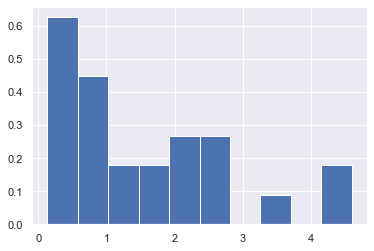

In [13]:
sample.hist(density=True)
plt.show()

How do the sample statistics compare to the population parameters?

In [14]:
# params = ['mean', 'median', 'std', 'prop <= 2'] # -- for reference, already defined
samp = [sample.mean(), 
        sample.median(), 
        sample.std(), 
        (sample<=2).mean()]
pd.DataFrame({'population': pop, 'sample': samp}, index=params)

,population,sample
mean,1.595769,1.538507
median,1.348980,1.207971
std,1.205621,1.255055
prop,0.682689,0.640000


The sample yields statistics that do not exactly equal the population parameters, due to sampling variation, but are reasonably close. 



### Normal Model Family: computing interval and tail probabilities, and percentiles

The normal model comprises a family of distributions with "bell-shaped" symmetric probability density functions. All normal density functions have the same basic shape, illustrated below. Different members of the normal family are distinguished by their by their means (centers) and standard deviations (spreads). 

Within the normal family of distributions we frequently need to compute probabilities such as

$$
P(X > c)
$$

or

$$
P(\vert X - \mu \vert \le c)
$$

where $X$ is a sample statistic whose distribution is known or well approximated by a normal distribution. How to compute these? For a given value of $c$ we need to know the distribution of $X$ and be able to compute the cdf for that distribution.

**Example:** Unbeknownst to Ted, when he goes to the clinic for a blood pressure measurement, the measurement can vary depending on various random factors, with a mean systolic blood pressure value of 120 mmHg, and a standard deviation of 8 mmHg. A measurement over 130 mmHg is considered borderline high blood pressure. Assume Ted's blood pressure measurements follow a **normal** distribution. What is the probability that Ted is measured to have borderline high blood pressure during a visit to the clinic?

**Answer:** First, let's have a look at the distribution of Ted's BP measurements. Vertical dashed lines show the locations of $\mu$, $\mu\pm \sigma$, and $\mu\pm 2 \sigma$, where $\mu=120$ represents the mean, and $\sigma=8$ represents the standard deviation.

In [15]:
from scipy.stats import norm

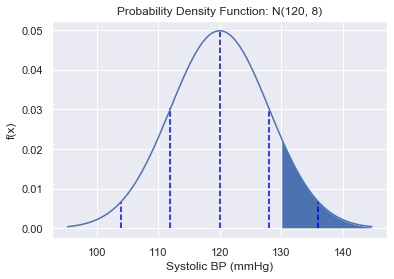

In [16]:
mu, sd = 120, 8
x = np.linspace(norm.ppf(0.001, loc=mu, scale=sd),
               norm.ppf(0.999, loc=mu, scale=sd), 100)
plt.plot(x, norm.pdf(x, loc=mu, scale=sd))
plt.xlabel('Systolic BP (mmHg)')
plt.ylabel('f(x)')
plt.title('Probability Density Function: N(120, 8)')
# add shaded areas whose probability we need
x130 = np.linspace(130, norm.ppf(0.999, loc=mu, scale=sd), 100)
plt.fill_between(x130, 0, norm.pdf(x130, loc=mu, scale=sd))
# add sd lines
xsd = np.array([mu-2*sd, mu-sd, mu, mu+sd, mu+2*sd])
plt.vlines(xsd, 0, norm.pdf(xsd, loc=mu, scale=sd), colors='blue', linestyle='--')
plt.show()

Let $X$ denote Ted's systolic blood pressure measurement. We need

$$
P(X > 130) = 1 - P(X \le 130) = 1 - F_X(130)
$$

We compute this probability using the 'norm.cdf' function in SciPy:

In [17]:
1-norm.cdf(130, loc=120, scale=8)

0.10564977366685535

In [18]:
norm.cdf(1.25)

0.8943502263331446

We see there is just over a 10% chance of a borderline high blood pressure measurement.

**Example:** The aforementioned Ted does not know his current blood pressure. In the past his measurements tended to jump around, with a standard deviation of 8 mmHg. When he gets a new measurement, what is the probability that it is within 4 mmHg of his true mean systolic blood pressure? Assume his blood pressure measurements are like random draws from a normal distribution with unknown mean $\mu$.

**Answer:**

How can we do this if we don't know the mean? The key is that we can deduce the distribution of the **difference** between the measurement and the mean, and that is sufficient to answer the question. If $X$ is normally distributed with mean $\mu$, then $Y=X-\mu$ is normally distributed with mean 0 and the same standard deviation as $X$. Here is what the pdf looks like now:

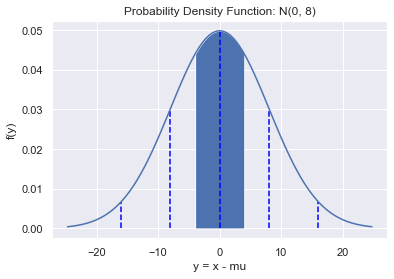

In [19]:
x0 = np.linspace(norm.ppf(0.001, loc=0, scale=sd),
               norm.ppf(0.999, loc=0, scale=sd), 100)
plt.plot(x0, norm.pdf(x0, loc=0, scale=sd))
plt.xlabel('y = x - mu')
plt.ylabel('f(y)')
plt.title('Probability Density Function: N(0, 8)')
# add shaded areas whose probability we need
xshade = np.arange(-4,4,0.01)
plt.fill_between(xshade, 0, norm.pdf(xshade, loc=0, scale=sd))
# add sd lines
xsd0 = np.array([0-2*sd, 0-sd, 0, 0+sd, 0+2*sd])
plt.vlines(xsd0, 0, norm.pdf(xsd0, loc=0, scale=sd), colors='blue', linestyle='--')
plt.show()

We need to compute

$$
P(\vert X - \mu \vert \le 4) = P(\vert Y \vert \le 4)
=P(-4 \le Y \le 4) = F_Y(4) - F_Y(-4).
$$

Using norm.cdf() we compute:

In [20]:
norm.cdf(4, loc=0, scale=8) - norm.cdf(-4, loc=0, scale=8)

0.38292492254802624

Only 38%. Apparently $\pm 4$ mmHg is too much precision to expect from one measurement of Ted's blood pressure!

**Example:** We're not done with Ted yet. Let's find a value $c$ such that there is a 95% chance that Ted's blood pressure measurement is within $c$ standard deviations of his true mean blood pressure. In this case we are assuming the standard deviation of the measurement is $8$ mmHg, though it turns out the answer does not require that information. Thus, we want to find $c$ so that

$$
P(\vert X - \mu \vert \le 8 c) = 0.95.
$$

This is the same as

$$
P\left(\left\vert {X - \mu\over 8} \right\vert \le c   \right) = 
P(\vert Z \vert \le c) = 0.95
$$

where $Z$ is normal with mean 0 and standard deviation 1. This is the **standard normal distribution**. Its pdf looks like this:

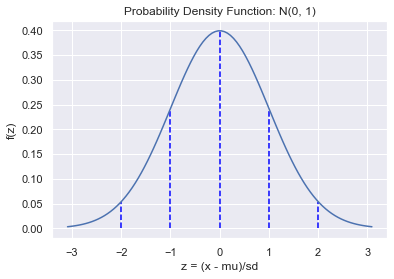

In [21]:
x01 = np.linspace(norm.ppf(0.001),
               norm.ppf(0.999), 100)
plt.plot(x01, norm.pdf(x01))
plt.xlabel('z = (x - mu)/sd')
plt.ylabel('f(z)')
plt.title('Probability Density Function: N(0, 1)')
# add sd lines
xsd0 = np.array([-2, -1, 0, 1, 2])
plt.vlines(xsd0, 0, norm.pdf(xsd0), colors='blue', linestyle='--')
plt.show()

So we see the same value of $c$ works for any standard deviation. OK, so what is $c$? Solve

$$
0.95 = P(Z \le c) - P(Z \le -c) = P(Z \le c) - (1 - P(Z \le c))
= 2 P(Z \le c) - 1
$$

because a normal distribution with mean zero is **symmetric**. This is the same as

$$
P(Z \le c) = {1 + 0.95 \over 2} = 0.975.
$$

Therefore we need the 97.5th percentile of the **standard normal distribution** (loc=0, scale=1, the default values). This is given by the function norm.ppf (normal ppoint percentile function):

In [22]:
print('c=', norm.ppf(0.975))

c= 1.959963984540054


We conclude that there is a 95% probability that a normally distributed random variable (such as Ted's blood pressure measurement) is within 1.96 standard devaitions of it's mean, whatever the mean and standard deviation might be!

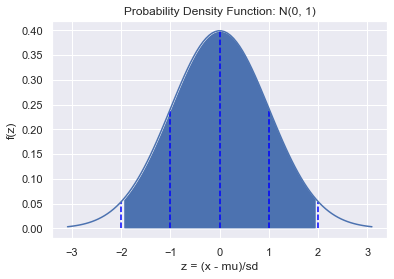

In [23]:
plt.plot(x01, norm.pdf(x01))
plt.xlabel('z = (x - mu)/sd')
plt.ylabel('f(z)')
plt.title('Probability Density Function: N(0, 1)')
# add shaded areas whose probability we need
xshade = np.arange(norm.ppf(0.025), norm.ppf(0.975), 0.01)
plt.fill_between(xshade, 0, norm.pdf(xshade))
# add sd lines
xsd0 = np.array([-2, -1, 0, 1, 2])
plt.vlines(xsd0, 0, norm.pdf(xsd0), colors='blue', linestyle='--')
plt.show()

How does $c$ change if we need only 90% or 80% probability of being within $c$ standard deviations of the true mean?

In [24]:
# Work here




### Exponential model family

The normal distribution is often used as a model for measurement errors and as an approximation to the distribution of sample averages and similar statistics. The normal distribution is symmetric about its mean, so it is equally likely to generate values above and below the mean. 

In contrast, the **exponential** family of models is often used for waiting times between random events, product lifetimes and other random phenomena. It has the distinctive feature that the probability of a value larger than $x$, say, decreases exponmentially. Thus, for an exponential random variable

$$
P(X > x) = \exp(-\lambda x), \quad x\ge 0,
$$

where $\lambda >0$ is a parameter determining the rate at which events occur per unit time interval, and therefore $\lambda$ determines the expected waiting time until the next event. In particular, if $X$ is exponentially distributed with rate parameter $\lambda$, then 

$$
E(X)={1\over \lambda}.
$$

Intuitively, this inverse relationship makes sense given the shorter waiting time betwee events that occur at a higher rate.

It follows that the cdf has the form

$$
F(x) = P(X \le x) = 1 - e^{-\lambda x},\quad x\ge 0,
$$

and it can be shown (by differentiation) that the pdf is given by

$$
f(x) = \lambda e^{-\lambda x}, \quad x\ge 0,
$$

and $f(x)=0$ for $x<0$.

Currently, the exponential family of modeling functions is implemented in the SciPy.org library as SciPy.stats.expon.

**Example:** An LED light is reported to have a life expectancy of 50,000 hours. Let's suppose that the randomness in its lifetime is well-modeled by en exponential distribution. What is the probability that the light lasts longer than 100,000 hours?

**Answer:**

First, let's express everything in k-hrs (thousands of hours). If the expected lifetime is 50 k-hrs, then the rate parameter $\lambda = 1/50 = 0.02$. The way the expon function is parametrized, we spoecify that the "location" is zero, and the "scale" is ${1\over\lambda} = 50$ in k-hrs. 

Here's what the pdf looks like, along with the probability area that we need to compute.

In [25]:
from scipy.stats import expon

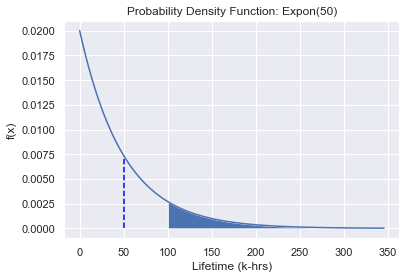

In [26]:
scale = 50
x = np.linspace(0,
               expon.ppf(0.999, loc=0, scale=scale), 100)
plt.plot(x, expon.pdf(x, loc=0, scale=scale))
plt.xlabel('Lifetime (k-hrs)')
plt.ylabel('f(x)')
plt.title('Probability Density Function: Expon(50)')
# add shaded areas whose probability we need
x100 = np.linspace(100, expon.ppf(0.999, loc=0, scale=scale), 100)
plt.fill_between(x100, 0, expon.pdf(x100, loc=0, scale=scale))
# add mean value
plt.vlines(50, 0, expon.pdf(50, loc=0, scale=scale), colors='blue', linestyle='--')
plt.show()

We need to compute the area of the shaded region. In this case, it is possible to do this directly using the formula. We can also do it using the expon.cdf() function. Try it!

It is interesting to compare the mean lifetime (50 k-hrs) and the median. How can we compute the median lifetime for this distribution?

### Review of rules for computing and combining probabilities

In an earlier section we saw that if the basic descrete outcomes of a random activity are equally likely, then we can frequenclty determine the prabablities of compound events (eg. a full house in poker) using cmbinatorial methods to count up how many of the possible outcomes are in the target set. 

To handle more general problems we will need additional principles concerning probabilities of events.

The basic rules follow from the long run relative frequency interpretation of probability. We denote the probability of an event $A$ using the notation $P(A)$.


+ For any event $A$, $0 \le P(A) \le 1$


+ If $\Omega$ is the set of all possible outcomes of a random experiement, then $P(\Omega)=1$.


+ $P(\text{not } A) = 1 - P(A)$


+ If $A$ and $B$ are **mutually exclusive**, that is, $A \cap B = \emptyset$, then $P(A \cup B) = P(A) + P(B)$.


+ In general, $P(A \cup B) = P(A) + P(B) - P(A \cap B) \le P(A) + P(B)$


+ **Independence** of $A$ and $B$ means that $P(A \cap B) = P(A) P(B)$. If this equality does not hold, then $A$ and $B$ are dependent.

+ The conditional probability of $A$ given that $B$ occurs is given by

$$
P(A \vert B) = {P(A \cap B) \over P(B)}.
$$

+ For independent events $P(A \vert B) = P(A)$ and $P(B \vert A) = P(B)$. In other words, knowledge of how one of the events turned out does not help us predict the other event.


### Application to events involving random variables

We will often consider events involving random varaibles, such as the event that $X$ lies in some interval $[a,b]$. Probabiliites of these types of events follow all of the above rules.

**Example of mutually exclusive events:** $X$ is a random number between 0 and 1. Then, using the fact that $\{X < 0.2\}$ and $\{X > 0.8\}$ are mutually exclusive events, 

$$
P(X < 0.2 \text{ or } X > 0.8) = P(X < 0.2) + P(X > 0.8) = 0.2 + 0.2 = 0.4
$$

#### Independent random variables:

Two random variables $X$ and $Y$ are **independent** if for any sets of values $A$ for $X$ and $B$ for $Y$ we have

$$
P(\{X \in A\} \cap \{Y \in B\}) = P(X \in A) P(Y \in B).
$$

Otherwise, $X$ and $Y$ are **dependent**.

**Example: Dependent or Independent?** A jar contains 5 red chips and 10 blue chips. We sample 2 chips at random without replacement. $X$ is the number of red chips. $Y$ is the number of blue chips. Are $X$ and $Y$ dependent or independent? Consider the probability that $X=2$ and $Y=2$. Does the probability that both of these things happen equal the product of the individual probabilities that each of them happens?



$$\quad$$

$$\quad$$

**Example: Dependendent or Independent?** Same jar. Now we draw two chips with replacement. $X$ is 1 if the first chip is blue and 0 otherwise. $Y$ is 1 if the second chip is blue, and zero otherwise. Are $X$ and $Y$ dependent or independent? Consider whether knowledge of the first draw tells us anything about what will happen on the second draw.

$$\quad$$

$$\quad$$

---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign